In [2]:
import json
import pandas as pd

In [18]:
# df= pd.read_json("NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-21-9035000000007229978580022078167998425756-NoGPS.json")
# the above line (attempt to dump the json file into a DF does not work since it seems to not be a valid json file

In [4]:
# cannot read as a valid json file

In [5]:
with open('NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-21-4316000000012023578610022078207087102898-NoGPS.json') as data_file: 
    data = json.load(data_file)

In [9]:
#some infos about the resulting DF
data.keys()

[u'status',
 u'isGpsActivity',
 u'links',
 u'tags',
 u'metricSummary',
 u'activityType',
 u'metrics',
 u'activityId',
 u'timeSeries',
 u'deviceType',
 u'startTime',
 u'activityTimeZone']

In [10]:
type(data)

dict

In [12]:
# we are interested in the metricSummary
data['metricSummary'].keys()

[u'duration', u'distance', u'calories', u'steps', u'fuel']

In [13]:
data['metricSummary'].keys()

[u'duration', u'distance', u'calories', u'steps', u'fuel']

In [15]:
# another key also gives the datetime of the run analyzed
data['startTime']

u'2016-02-21T11:35:29Z'

In [17]:
data['startTime'][:10]

u'2016-02-21'

## dirty solution
<ul>
<li>read the json file as a serie
<li>create a DF from this serie
<li>transpose row <--> col
</ul>

In [19]:
# test = pd.read_json('myJsonFile.json',typ='series')
# P = pd.DataFrame.from_dict(test['metricSummary'],orient='index').transpose()

In [20]:
test = pd.read_json('NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-21-4316000000012023578610022078207087102898-NoGPS.json',typ='series')

In [28]:
P = pd.DataFrame.from_dict(test['metricSummary'],orient='index').transpose()

In [29]:
P

,duration,distance,calories,steps,fuel
0,0:40:13.000,6.6075,372,7708,1738


In [23]:
col = ['calories', 'distance','duration','fuel','steps']

In [34]:
index = range(0)

In [35]:
df = pd.DataFrame(index=index, columns=col)

In [36]:
df

,calories,distance,duration,fuel,steps


In [37]:
df.append(data['metricSummary'],ignore_index=True)

,calories,distance,duration,fuel,steps
0,372,6.6075,0:40:13.000,1738,7708


In [98]:
file = open('test.txt','r')
for line in file:
    print line

NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-21-3366000000017550450550022078233369828939.json

NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-21-4316000000012023578610022078207087102898-NoGPS.json

NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-21-9035000000007229978580022078167998425756-NoGPS.json

NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-22-4316000000000774467960022078207087175749-NoGPS.json

NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-23-3947000000003790108190022078197207251106-NoGPS.json



In [57]:
df2 = pd.DataFrame(index=index, columns=col)

In [58]:
df2

,calories,distance,duration,fuel,steps


In [69]:
import glob
counter=0
for filename in glob.glob('NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/*.json'):
    print filename
    with open(filename) as data_file:    
        data = json.load(data_file)
        print data['metricSummary']
        df2.loc[counter] = data['metricSummary']
        counter=counter+1
        #df2.append(data['metricSummary'],ignore_index=True)

NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-21-3366000000017550450550022078233369828939.json
{u'duration': u'0:02:31.000', u'distance': 0.49239999055862427, u'calories': 27, u'steps': 12, u'fuel': 127}
NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-21-4316000000012023578610022078207087102898-NoGPS.json
{u'duration': u'0:40:13.000', u'distance': 6.607500076293945, u'calories': 372, u'steps': 7708, u'fuel': 1738}
NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-21-9035000000007229978580022078167998425756-NoGPS.json
{u'duration': u'1:01:50.000', u'distance': 9.769200325012207, u'calories': 550, u'steps': 16436118, u'fuel': 2541}
NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-22-4316000000000774467960022078207087175749-NoGPS.json
{u'duration': u'1:10:37.000', u'distance': 11.429400444030762, u'calories': 644, u'steps': 13358, u'fuel': 2994}
NikePlus-Export-995a6cc0bd0e43d69672532cb51e160e/NikePlus-2016-02-23-39470

In [70]:
df2

,calories,distance,duration,fuel,steps
0,27,0.4924,0:02:31.000,127,12
1,372,6.6075,0:40:13.000,1738,7708
2,550,9.7692,1:01:50.000,2541,16436118
3,644,11.4294,1:10:37.000,2994,13358
4,645,11.4507,1:10:08.000,2994,5216818


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [89]:
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive
from pandas import Series, DataFrame

In [100]:
#df2['calories'].hist()

In [104]:
def show(field):
    df2[field].hist(bins=50)

In [105]:
#show('calories')

In [106]:
w = interactive(show, field=widgets.Select(
    description='Categories:',
    options=['calories','distance','duration','fuel','steps'],
))

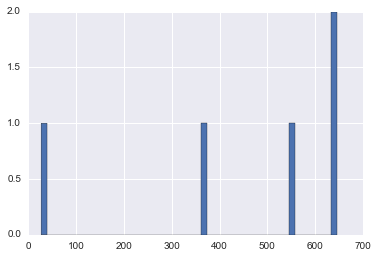

In [107]:
display(w)